Hungarian physician Dr. Ignaz Semmelweis worked at the Vienna General Hospital with childbed fever patients. Childbed fever is a deadly disease affecting women who have just given birth, and in the early 1840s, as many as 10% of the women giving birth died from it at the Vienna General Hospital. Dr.Semmelweis discovered that it was the contaminated hands of the doctors delivering the babies, and on **June 1st, 1847**, he decreed that everyone should wash their hands, an unorthodox and controversial request; nobody in Vienna knew about bacteria.

You will reanalyze the data that made Semmelweis discover the importance of handwashing and its impact on the hospital and the number of deaths.

The data is stored as two CSV files within the `data` folder.

`data/yearly_deaths_by_clinic.csv` contains the number of women giving birth at the two clinics at the Vienna General Hospital between the years 1841 and 1846.

| Column | Description |
|--------|-------------|
|`year`  |Years (1841-1846)|
|`births`|Number of births|
|`deaths`|Number of deaths|
|`clinic`|Clinic 1 or clinic 2|

`data/monthly_deaths.csv` contains data from 'Clinic 1' of the hospital where most deaths occurred.

| Column | Description |
|--------|-------------|
|`date`|Date (YYYY-MM-DD)
|`births`|Number of births|
|`deaths`|Number of deaths|

&nbsp;

&nbsp;

***
How much did handwashing reduce monthly death rates on average?

What year had the highest yearly proportion of deaths at each clinic? Visualize the data and store the answer as an integer variable highest_year.

Handwashing was introduced on June 1st, 1847. What are the mean proportions of deaths before and after handwashing from the monthly data? Store the result as a 2x2 DataFrame named monthly_summary with the first column, handwashing_started, being a boolean flag and the second column having the mean proportion of deaths.

Analyze the difference in the mean monthly proportion of deaths before and after the introduction of handwashing using all of the data and calculate a 95% confidence interval. Store your answer as a pandas series confidence_interval.

In [78]:
# Imported libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import numpy as np

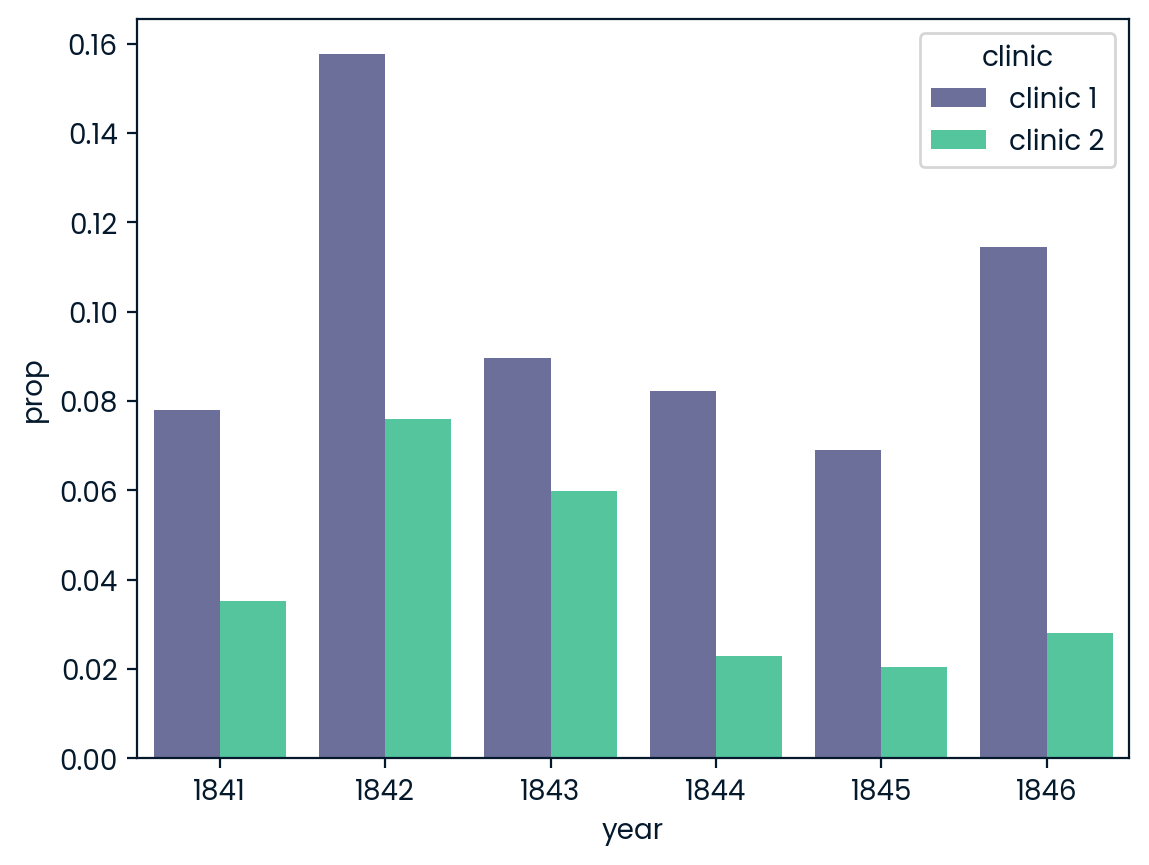

   handwashing_started  mean_deaths
0                False     0.105050
1                 True     0.021093
0.025   -0.100594
0.975   -0.067192
dtype: float64


In [79]:
# Start coding here
# Use as many cells as you like!

# load csv 
df_y = pd.read_csv('data/yearly_deaths_by_clinic.csv')
df_m = pd.read_csv('data/monthly_deaths.csv')

# # explore df 
# print(df_y.head())
df_m['date'] = pd.to_datetime(df_m['date'])
# print(df_m.info())

# What year had the highest yearly proportion of deaths at each clinic?
df_y['prop'] = df_y['deaths'] / df_y['births']
df_y_c1 = df_y[df_y['clinic'] == 'clinic 1']
df_y_c2 = df_y[df_y['clinic'] == 'clinic 2']
df_y_c1.sort_values(by='prop', ascending=False, inplace=True)
df_y_c2.sort_values(by='prop', ascending=False, inplace=True)

# visualise
sns.barplot(data=df_y, x='year', y='prop', hue='clinic')
plt.show()
highest_year = 1842

# What are the mean proportions of deaths before and after handwashing from the monthly data?
df_m['prop'] = df_m['deaths'] / df_m['births']
df_m_bhw = df_m[df_m['date'] < '1847-06-01']
df_m_ahw = df_m[df_m['date'] >= '1847-06-01']
monthly_summary = pd.DataFrame({'handwashing_started': [False, True], 'mean_deaths': [df_m_bhw['prop'].mean(), df_m_ahw['prop'].mean()]})
print(monthly_summary)

# calculate a 95% confidence interval
s_m_bhw = df_m[df_m['date'] < '1847-06-01']['prop']
s_m_ahw = df_m[df_m['date'] >= '1847-06-01']['prop']

bt_smp = []
for _ in range(0, 8000):
    smp_b = s_m_bhw.sample(frac=1, replace=True)
    smp_a = s_m_ahw.sample(frac=1, replace=True)
    smp_diff = smp_a.mean() - smp_b.mean()
    bt_smp.append(smp_diff)

bt_smp_s = pd.Series(bt_smp)
confidence_interval = bt_smp_s.quantile([0.025, 0.975])
print(confidence_interval)